### Import main packages

In [1]:
import numpy as np
import figurefirst as fifi
import matplotlib as mpl
from mpmath import *
import matplotlib.font_manager

### Initialize plotting parameters

In [2]:
# Plotting parameters
basefs=9
mpl.rcParams["mathtext.fontset"]    = "cm"
mpl.rcParams['font.family']         = 'Arial'
mpl.rcParams["font.size"]           = basefs
mpl.rcParams["axes.labelsize"]      = basefs+2
mpl.rcParams["xtick.labelsize"]     = basefs
mpl.rcParams["ytick.labelsize"]     = basefs
mpl.rcParams["legend.fontsize"]     = basefs
mpl.rcParams["legend.edgecolor"]    = "black" ;
mpl.rcParams["legend.fancybox"]     = True
mpl.rcParams["legend.borderpad"]    = 0.5
mpl.rcParams["legend.handlelength"] = .75
mpl.rcParams["lines.linewidth"]     = 2
mpl.rcParams["lines.markersize"]    = 2
mpl.rcParams["text.usetex"]         = False
mpl.rcParams["text.latex.preamble"] = "\\usepackage{amsmath,amsthm}; \\usepackage{physics}";

{'ismplfigure': False}


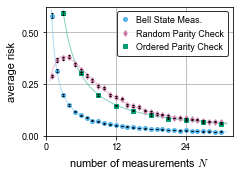

In [8]:
filename = "BDS_dirinv_layout" 

layout = fifi.svg_to_axes.FigureLayout(
                                       filename + ".svg",
                                       autogenlayers=True, 
                                       make_mplfigures=True, hide_layers=[]
                                      )

ax = layout.axes[("fig", "ax")]

title = ['BDS_dirichlet']
name = "unordered.npy"
meas = ['Bell State Meas.', 'Ordered Parity Check','Random Parity Check']
c_meas = ['#56B4E9', '#009E73', '#CC79A7', '#D55E00', '#E69F00', '#0072B2']
markers = ['o', 's', 'd']

n_meas = [np.arange(1, 31, 1, dtype= int), np.arange(3, 31, 3, dtype= int), np.arange(1, 31, 1, dtype= int)]
n_sample = 1000

m_s = 4 #markersize
l_w = 1 #linewidth

HS = np.load(name)[5, 0, 0, :, :, :n_sample] #[estimator][nmeas][meas][sample]

th_sq = 2 / 5
def fun(N):
    return (2/3)**N * ((1 - th_sq)*(1/2 * N * hyp3f2(1, 1, 1 - N, 2, 2, -1/2) - 1) + 3/4)

axs = layout.axes[("fig", "ax")]

for i in [0, 2, 1]:
    temp = HS[i][:len(n_meas[i])]
    HS_std = np.std(1 - temp, axis=1) / np.sqrt(n_sample)
    axs.errorbar(n_meas[i], np.average(temp, axis=1), yerr= HS_std, c= c_meas[i], lw=0, ls= "", marker= markers[i], ms= m_s, alpha=1, label= meas[i], zorder= 3)
    axs.errorbar(n_meas[i], np.average(temp, axis=1), yerr= HS_std, c= 'black', lw= 0.5, ls= "",  ms= 0, alpha=1, capsize= 1, zorder= 4)


x = np.linspace(0.99, 31, 1000)
axs.plot(x, 3/(5*x), c= c_meas[0], ls= '-', lw= l_w, alpha = 0.5, zorder= 1)
axs.plot(x, 3/(5*x), c= 'white', ls= '-', lw= l_w, alpha = 0.1, zorder= 2)
x = np.linspace(0.7, 31, 1000)
y= [fun(N) for N in x]
axs.plot(x, y, c= c_meas[2],  ls= '-', lw= l_w, alpha= 0.5, zorder= 1)
axs.plot(x, y, c= 'white',  ls= '-', lw= l_w, alpha= 0.1, zorder= 2)
x = np.linspace(2.96, 31, 1000)
axs.plot(x, 9/(5*x), c= c_meas[1], ls= '-', lw= l_w, alpha =0.5, zorder= 1)
axs.plot(x, 9/(5*x), c= 'white', ls= '-', lw= l_w, alpha =0.1, zorder= 2)

axs.set_xlim(0, 32)
axs.set_ylim(0, 0.625)
axs.set_xticks(np.arange(0, 31, 12, dtype= int))
axs.set_yticks([0, 0.25, 0.5])
axs.legend(loc='upper right')
axs.grid()
axs.set_axisbelow(True)
axs.set_xlabel(r'number of measurements $N$')
axs.set_ylabel(r'average risk')
    
tmp = layout.save("BDS_mean_dirinv.svg")